In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Project/Phishing_Email.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
df['Email Type'] = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})


In [ ]:
def clean_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    return text

In [ ]:
df['cleaned_text'] = df['Email Text'].apply(lambda x: clean_text(x))

In [ ]:
X = df['cleaned_text'].values
Y = df['Email Type'].values

In [ ]:
vocab_size = 5000
max_length = 100

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_length, padding='post', truncating='post')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pad, Y, test_size=0.2, random_state=42)

In [ ]:
embedding_dim = 50

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/10
187/187 - 11s - 58ms/step - accuracy: 0.8210 - loss: 0.3563 - val_accuracy: 0.9480 - val_loss: 0.1279
Epoch 2/10
187/187 - 12s - 63ms/step - accuracy: 0.9654 - loss: 0.0915 - val_accuracy: 0.9567 - val_loss: 0.1054
Epoch 3/10
187/187 - 11s - 61ms/step - accuracy: 0.9816 - loss: 0.0473 - val_accuracy: 0.9591 - val_loss: 0.1140
Epoch 4/10
187/187 - 15s - 78ms/step - accuracy: 0.9876 - loss: 0.0291 - val_accuracy: 0.9581 - val_loss: 0.1235
Epoch 5/10
187/187 - 15s - 79ms/step - accuracy: 0.9888 - loss: 0.0227 - val_accuracy: 0.9624 - val_loss: 0.1295
Epoch 6/10
187/187 - 8s - 45ms/step - accuracy: 0.9893 - loss: 0.0212 - val_accuracy: 0.9581 - val_loss: 0.1458
Epoch 7/10
187/187 - 11s - 58ms/step - accuracy: 0.9892 - loss: 0.0203 - val_accuracy: 0.9564 - val_loss: 0.1525
Epoch 8/10
187/187 - 7s - 39ms/step - accuracy: 0.9894 - loss: 0.0197 - val_accuracy: 0.9594 - val_loss: 0.1562
Epoch 9/10
187/187 - 8s - 40ms/step - accuracy: 0.9894 - loss: 0.0202 - val_accuracy: 0.9577 - val

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.2f}")

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9583 - loss: 0.1927
Test Accuracy: 0.96


In [ ]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(Y_test, Y_pred, target_names=['Safe Email', 'Phishing Email']))

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
                precision    recall  f1-score   support

    Safe Email       0.98      0.95      0.97      2209
Phishing Email       0.94      0.97      0.95      1518

      accuracy                           0.96      3727
     macro avg       0.96      0.96      0.96      3727
  weighted avg       0.96      0.96      0.96      3727



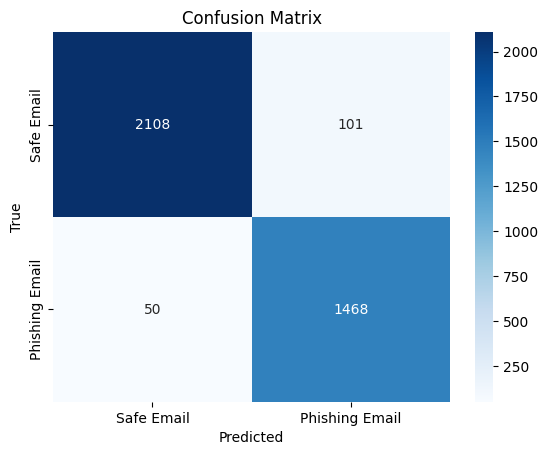

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe Email', 'Phishing Email'], yticklabels=['Safe Email', 'Phishing Email'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()